In [6]:
import sys
sys.path.append('/home/jbourbeau/cr-composition')
sys.path

['',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages/setuptools-15.2-py2.7.egg',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages/setuptools-15.2-py2.7.egg',
 '/home/jbourbeau/.local/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/i3ports/root-v5.34.18/lib',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/i3ports/lib/python2.7/site-packages',
 '/data/user/jbourbeau/metaprojects/icerec/V05-00-00/build/lib',
 '/home/jbourbeau/cr-composition/analysis',
 '/home/jbourbeau',
 '/home/jbourbeau/useful',
 '/home/jbourbeau/anisotropy',
 '/home/jbourbeau/ShowerLLH_scripts',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python27.zip',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/pyth

In [7]:
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn.apionly as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve, GridSearchCV, cross_val_score, ParameterGrid

import composition as comp

%matplotlib inline

In [8]:
sns.set_palette('muted')
sns.set_color_codes()

In [9]:
layers = ['_1_60', '_1_45', '_1_30', '_1_15', '_1_6']
# feature_lists = [['reco_log_energy', 'InIce_log_charge_1_60', 'LLHlap_cos_zenith', 'lap_chi2', 'NChannels_1_60'],
#                 ['reco_log_energy', 'InIce_log_charge_1_45', 'LLHlap_cos_zenith', 'lap_chi2', 'NChannels_1_45'],
#                 ['reco_log_energy', 'InIce_log_charge_1_30', 'LLHlap_cos_zenith', 'lap_chi2', 'NChannels_1_30'],
#                 ['reco_log_energy', 'InIce_log_charge_1_15', 'LLHlap_cos_zenith', 'lap_chi2', 'NChannels_1_15'],
#                 ['reco_log_energy', 'InIce_log_charge_1_6', 'LLHlap_cos_zenith', 'lap_chi2', 'NChannels_1_6']]
feature_lists = [['reco_log_energy', 'InIce_log_charge_1_60', 'LLHlap_cos_zenith', 'lap_chi2', 'NChannels_1_60', 'log_s125'],
                ['reco_log_energy', 'InIce_log_charge_1_45', 'LLHlap_cos_zenith', 'lap_chi2', 'NChannels_1_45', 'log_s125'],
                ['reco_log_energy', 'InIce_log_charge_1_30', 'LLHlap_cos_zenith', 'lap_chi2', 'NChannels_1_30', 'log_s125'],
                ['reco_log_energy', 'InIce_log_charge_1_15', 'LLHlap_cos_zenith', 'lap_chi2', 'NChannels_1_15', 'log_s125'],
                ['reco_log_energy', 'InIce_log_charge_1_6', 'LLHlap_cos_zenith', 'lap_chi2', 'NChannels_1_6', 'log_s125']]
feature_labels = np.array(['$\\log_{10}({\mathrm{E/GeV})$', 'InIce charge', '$\cos(\\theta)$',
              '$\mathrm{Laputop}\ \chi^2/\mathrm{n.d.f.}$','NChannels', 's125'])
label_list = ['Full detector', 'Top 75\%', 'Top 50\%', 'Top 25\%', 'Top 10\%']

number training events = 36125
Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.7s
[Parallel(n_jobs=10)]: Done  95 out of  95 | elapsed:   25.9s finished


best GS CV score = 0.80553633218
best GS CV depths = {'classifier__max_depth': 15}
Grid scores on development set:
0.668 (+/-0.010) for {'classifier__max_depth': 1}
0.721 (+/-0.007) for {'classifier__max_depth': 2}
0.726 (+/-0.006) for {'classifier__max_depth': 3}
0.740 (+/-0.006) for {'classifier__max_depth': 4}
0.751 (+/-0.009) for {'classifier__max_depth': 5}
0.773 (+/-0.011) for {'classifier__max_depth': 6}
0.784 (+/-0.012) for {'classifier__max_depth': 7}
0.793 (+/-0.011) for {'classifier__max_depth': 8}
0.796 (+/-0.012) for {'classifier__max_depth': 9}
0.800 (+/-0.007) for {'classifier__max_depth': 10}
0.802 (+/-0.010) for {'classifier__max_depth': 11}
0.802 (+/-0.011) for {'classifier__max_depth': 12}
0.805 (+/-0.010) for {'classifier__max_depth': 13}
0.804 (+/-0.009) for {'classifier__max_depth': 14}
0.806 (+/-0.010) for {'classifier__max_depth': 15}
0.804 (+/-0.010) for {'classifier__max_depth': 16}
0.805 (+/-0.012) for {'classifier__max_depth': 17}
0.805 (+/-0.012) for {'clas

[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.2s
[Parallel(n_jobs=10)]: Done  95 out of  95 | elapsed:   25.8s finished


best GS CV score = 0.80614532872
best GS CV depths = {'classifier__max_depth': 15}
Grid scores on development set:
0.669 (+/-0.010) for {'classifier__max_depth': 1}
0.724 (+/-0.008) for {'classifier__max_depth': 2}
0.731 (+/-0.010) for {'classifier__max_depth': 3}
0.744 (+/-0.007) for {'classifier__max_depth': 4}
0.758 (+/-0.009) for {'classifier__max_depth': 5}
0.777 (+/-0.008) for {'classifier__max_depth': 6}
0.788 (+/-0.006) for {'classifier__max_depth': 7}
0.794 (+/-0.007) for {'classifier__max_depth': 8}
0.799 (+/-0.010) for {'classifier__max_depth': 9}
0.801 (+/-0.009) for {'classifier__max_depth': 10}
0.803 (+/-0.009) for {'classifier__max_depth': 11}
0.804 (+/-0.010) for {'classifier__max_depth': 12}
0.804 (+/-0.009) for {'classifier__max_depth': 13}
0.804 (+/-0.011) for {'classifier__max_depth': 14}
0.806 (+/-0.012) for {'classifier__max_depth': 15}
0.806 (+/-0.012) for {'classifier__max_depth': 16}
0.806 (+/-0.008) for {'classifier__max_depth': 17}
0.805 (+/-0.009) for {'clas

[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.3s
[Parallel(n_jobs=10)]: Done  95 out of  95 | elapsed:   25.5s finished


best GS CV score = 0.812871972318
best GS CV depths = {'classifier__max_depth': 16}
Grid scores on development set:
0.651 (+/-0.011) for {'classifier__max_depth': 1}
0.730 (+/-0.013) for {'classifier__max_depth': 2}
0.740 (+/-0.012) for {'classifier__max_depth': 3}
0.754 (+/-0.010) for {'classifier__max_depth': 4}
0.769 (+/-0.010) for {'classifier__max_depth': 5}
0.787 (+/-0.013) for {'classifier__max_depth': 6}
0.797 (+/-0.010) for {'classifier__max_depth': 7}
0.802 (+/-0.011) for {'classifier__max_depth': 8}
0.805 (+/-0.011) for {'classifier__max_depth': 9}
0.810 (+/-0.010) for {'classifier__max_depth': 10}
0.811 (+/-0.012) for {'classifier__max_depth': 11}
0.812 (+/-0.015) for {'classifier__max_depth': 12}
0.812 (+/-0.012) for {'classifier__max_depth': 13}
0.811 (+/-0.011) for {'classifier__max_depth': 14}
0.812 (+/-0.013) for {'classifier__max_depth': 15}
0.813 (+/-0.012) for {'classifier__max_depth': 16}
0.812 (+/-0.012) for {'classifier__max_depth': 17}
0.813 (+/-0.013) for {'cla

[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.4s
[Parallel(n_jobs=10)]: Done  95 out of  95 | elapsed:   41.6s finished


best GS CV score = 0.824379707576
best GS CV depths = {'classifier__max_depth': 18}
Grid scores on development set:
0.662 (+/-0.010) for {'classifier__max_depth': 1}
0.741 (+/-0.010) for {'classifier__max_depth': 2}
0.748 (+/-0.007) for {'classifier__max_depth': 3}
0.767 (+/-0.009) for {'classifier__max_depth': 4}
0.784 (+/-0.008) for {'classifier__max_depth': 5}
0.798 (+/-0.007) for {'classifier__max_depth': 6}
0.808 (+/-0.007) for {'classifier__max_depth': 7}
0.813 (+/-0.008) for {'classifier__max_depth': 8}
0.817 (+/-0.007) for {'classifier__max_depth': 9}
0.818 (+/-0.006) for {'classifier__max_depth': 10}
0.820 (+/-0.006) for {'classifier__max_depth': 11}
0.821 (+/-0.005) for {'classifier__max_depth': 12}
0.822 (+/-0.006) for {'classifier__max_depth': 13}
0.823 (+/-0.006) for {'classifier__max_depth': 14}
0.824 (+/-0.005) for {'classifier__max_depth': 15}
0.823 (+/-0.005) for {'classifier__max_depth': 16}
0.823 (+/-0.006) for {'classifier__max_depth': 17}
0.824 (+/-0.005) for {'cla

[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.7s
[Parallel(n_jobs=10)]: Done  95 out of  95 | elapsed:   25.8s finished


best GS CV score = 0.820099395719
best GS CV depths = {'classifier__max_depth': 19}
Grid scores on development set:
0.660 (+/-0.012) for {'classifier__max_depth': 1}
0.739 (+/-0.012) for {'classifier__max_depth': 2}
0.749 (+/-0.015) for {'classifier__max_depth': 3}
0.764 (+/-0.015) for {'classifier__max_depth': 4}
0.783 (+/-0.017) for {'classifier__max_depth': 5}
0.798 (+/-0.018) for {'classifier__max_depth': 6}
0.805 (+/-0.017) for {'classifier__max_depth': 7}
0.810 (+/-0.012) for {'classifier__max_depth': 8}
0.813 (+/-0.012) for {'classifier__max_depth': 9}
0.815 (+/-0.011) for {'classifier__max_depth': 10}
0.817 (+/-0.013) for {'classifier__max_depth': 11}
0.818 (+/-0.012) for {'classifier__max_depth': 12}
0.818 (+/-0.012) for {'classifier__max_depth': 13}
0.819 (+/-0.012) for {'classifier__max_depth': 14}
0.819 (+/-0.010) for {'classifier__max_depth': 15}
0.820 (+/-0.010) for {'classifier__max_depth': 16}
0.820 (+/-0.011) for {'classifier__max_depth': 17}
0.820 (+/-0.010) for {'cla

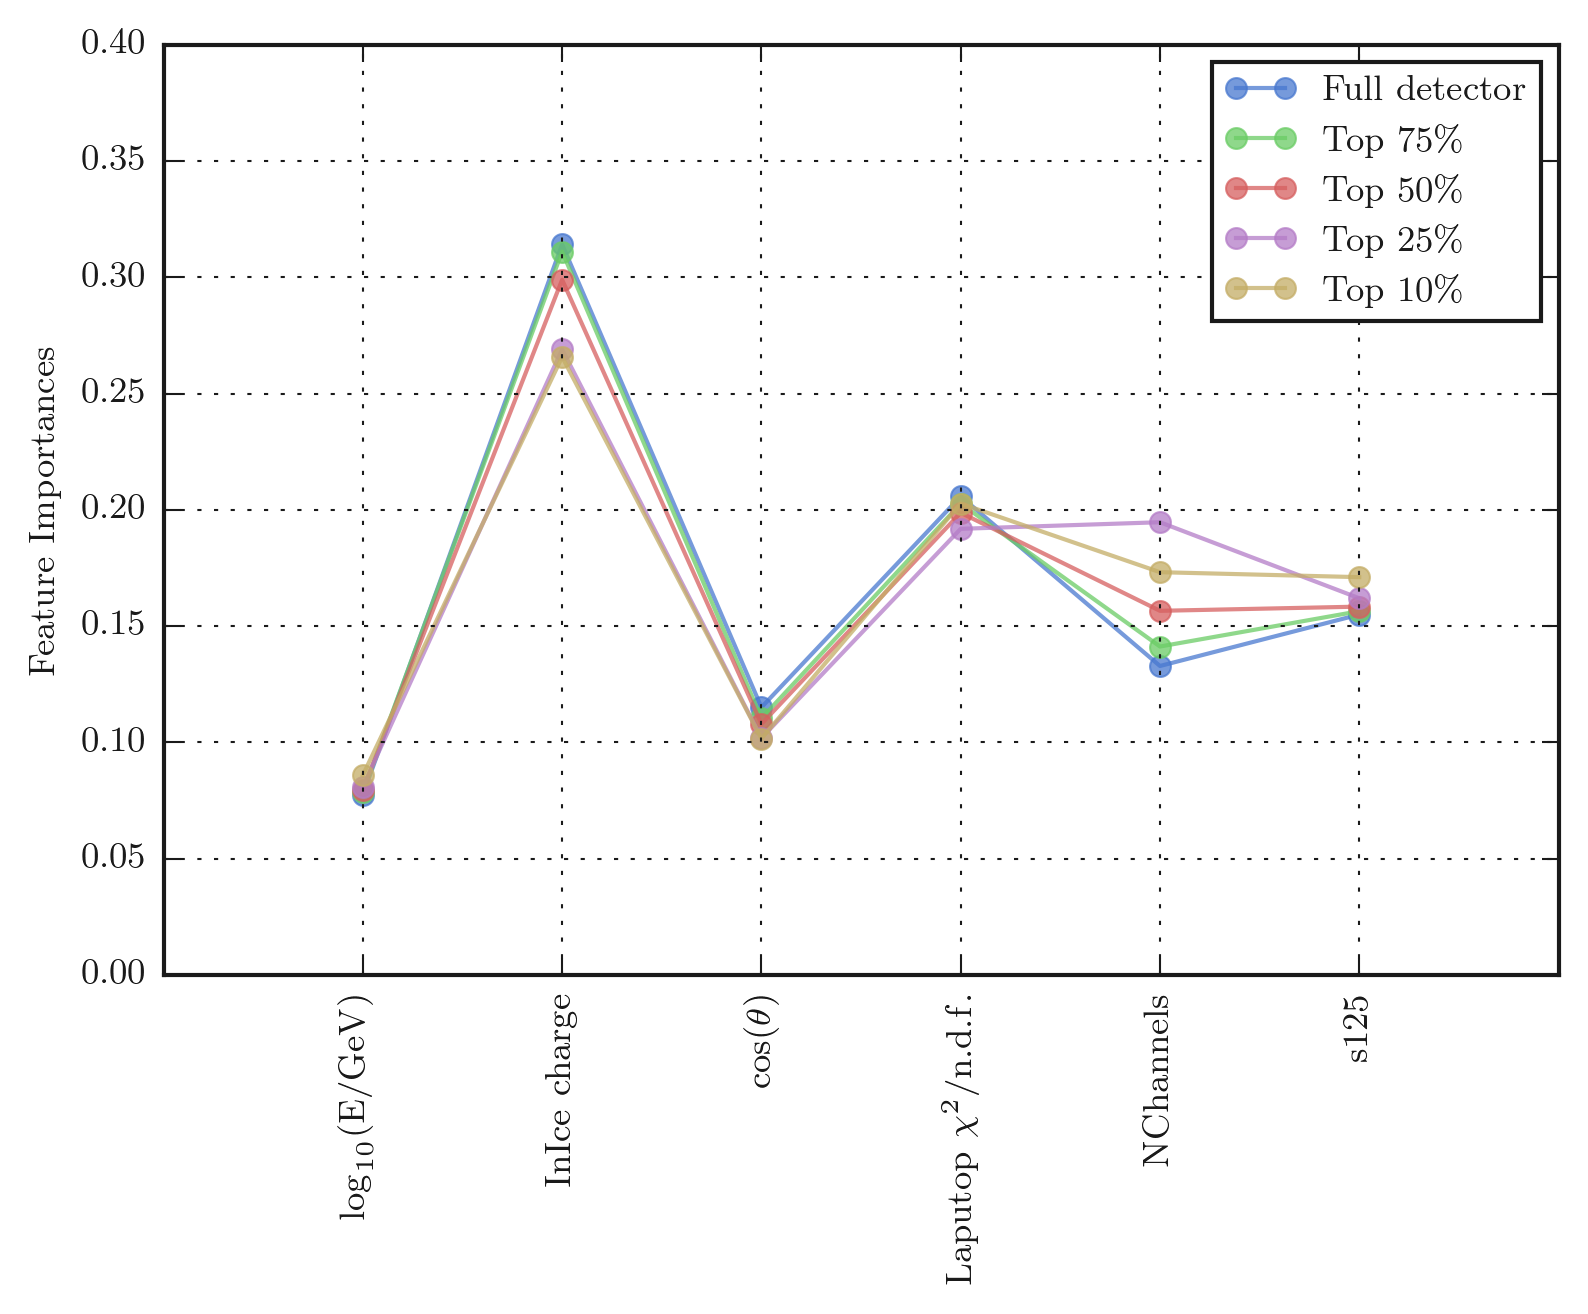

In [10]:
fig, ax = plt.subplots()
for feature_list, label, layer in zip(feature_lists, label_list, layers):
    df, cut_dict = comp.load_sim(return_cut_dict=True)
    selection_mask = np.array([True] * len(df))
    standard_cut_keys = ['LLHlap_reco_exists', 'LLHlap_zenith', 'NStations', 'IT_signal',
                         'StationDensity', 'LLHlap_containment',
                         'energy_range']
    standard_cut_keys += ['NChannels' + layer, 'max_qfrac' + layer]
    for key in standard_cut_keys:
        selection_mask *= cut_dict[key]

    df = df[selection_mask]

    X_train, X_test, y_train, y_test, le = comp.get_train_test_sets(df, feature_list)

    print('number training events = ' + str(y_train.shape[0]))
    pipeline = comp.get_pipeline('RF')
    param_range = np.arange(1, 20)
    param_grid = {'classifier__max_depth': param_range}
    gs = GridSearchCV(estimator=pipeline,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=5,
                      verbose=1,
                      n_jobs=10)
    gs = gs.fit(X_train, y_train)
    print('best GS CV score = {}'.format(gs.best_score_))
    print('best GS CV depths = {}'.format(gs.best_params_))
    print('Grid scores on development set:')
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    pipeline.set_params(**gs.best_params_)
    pipeline.fit(X_train, y_train)
    scaler = pipeline.named_steps['scaler']
    clf = pipeline.named_steps['classifier']
    # Plot fraction of events vs energy
    num_features = len(feature_list)
    importances = pipeline.named_steps['classifier'].feature_importances_
#     indices = np.argsort(importances)[::-1]

#     for f in range(num_features):
#         print('{}) {}'.format(f + 1, importances[indices[f]]))

    ax.set_ylabel('Feature Importances')
    ax.plot(range(num_features),
            importances, linestyle='-', label=label, alpha=0.75)

    plt.xticks(range(num_features),
               feature_labels, rotation=90)
    ax.set_xlim([-1, len(feature_list)])
    ax.set_ylim([0, .40])
plt.legend()
plt.grid()
plt.show()